c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\User

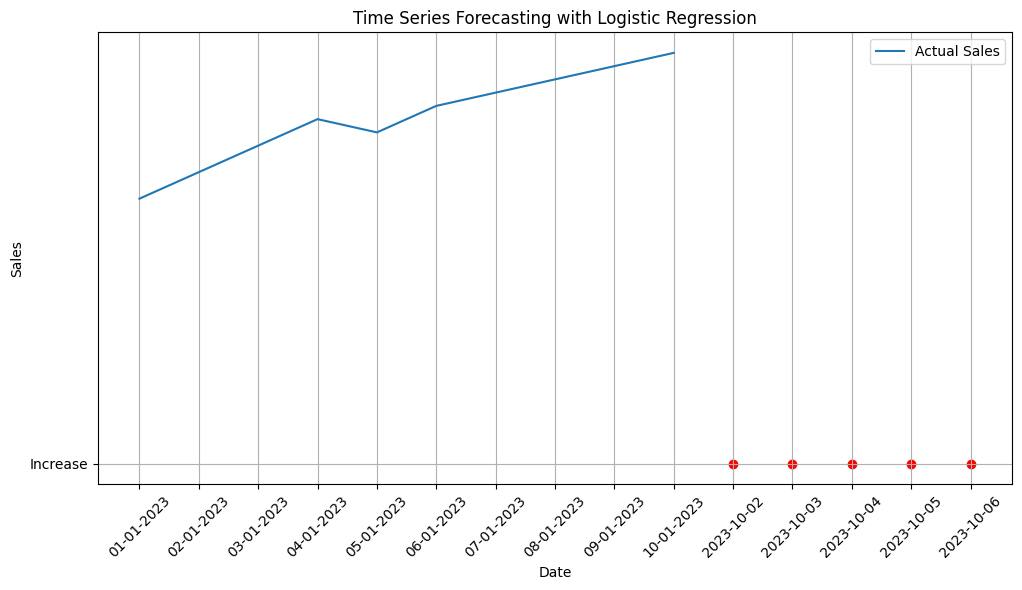

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('TIMESERIESFORECASTING.csv')  # Replace 'your_dataset.csv' with the actual file name

# Prepare the data
X = data[['Advertising Spend', 'Temperature', 'Holiday']]
y = data['Sales']  # Assuming 'Sales' is a binary outcome (1: increase, 0: decrease)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict future sales for the next 5 days
last_date = pd.to_datetime(data['Date'].iloc[-1])
next_days = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]
next_days_str = [date.strftime('%Y-%m-%d') for date in next_days]

predicted_sales = []
for _ in range(5):
    # Use example values for advertising spend, temperature, and holiday for prediction
    next_day_features = [[100, 23, 0]]  # Example values for advertising spend, temperature, and holiday
    predicted_sale = model.predict(next_day_features)[0]
    predicted_sales.append(predicted_sale)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting with Logistic Regression')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Adding predicted sales to the plot
for day, sale in zip(next_days_str, predicted_sales):
    plt.scatter(day, data['Sales'].iloc[-1] if not predicted_sales else 'Increase' if sale else 'Decrease', color='red', label='Predicted Sales')

plt.show()
